## Testing wavelet anaylsis

In [1]:
%matplotlib notebook
import ipympl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from astropy.stats import sigma_clip

from astropy.io import fits
from glob import glob

#import sklearn
from sklearn.decomposition import FastICA

/Users/ryanr/anaconda3/lib/python3.5/site-packages/ipympl/__init__.py:25: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'nbAgg' by the following code:
  File "/Users/ryanr/anaconda3/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/ryanr/anaconda3/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/ryanr/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/ryanr/anaconda3/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/ryanr/anaconda3/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/User

In [2]:
pixelfile = '/Users/ryanr/Documents/PhD/coding/Kepler/Data/ktwo203830112-c112_lpd-targ.fits.gz'#ktwo230533709-c111_lpd-targ.fits.gz'#ktwo210780278-c13_lpd-targ.fits.gz'#ktwo201657691-c14_lpd-targ.fits.gz'#ktwo201223037-c01_lpd-targ.fits.gz'#ktwo248517243-c14_lpd-targ.fits.gz'#ktwo251457101-c14_lpd-targ.fits.gz'#ktwo201357268-c01_lpd-targ.fits.gz'#ktwo201834023-c01_lpd-targ.fits.gz'#'/Users/ryanr/Documents/PhD/coding/Kepler/pipelines/goldenrod/data/ktwo212269339-c06_lpd-targ.fits.gz'
save = '/Users/ryanr/Documents/PhD/coding/Kepler/K2'


hdu = fits.open(pixelfile)
dat = hdu[1].data
datacube = fits.ImageHDU(hdu[1].data.field('FLUX')[:]).data#np.copy(testdata)#
if datacube.shape[1] > 1 and datacube.shape[2] > 1:
    print('in')
    ind = np.where(np.isfinite(datacube[0]))
    for i in range(len(ind)):
        lc = datacube[:,ind[0][i],ind[1][i]]
        datacube[sigma_clip(lc,sigma=5.).mask,ind[0][i],ind[1][i]] = np.nan

in


/Users/ryanr/anaconda3/lib/python3.5/site-packages/astropy/stats/sigma_clipping.py:165: RuntimeWarning: invalid value encountered in greater
  _filtered_data.mask |= _filtered_data > max_value
/Users/ryanr/anaconda3/lib/python3.5/site-packages/astropy/stats/sigma_clipping.py:166: RuntimeWarning: invalid value encountered in less
  _filtered_data.mask |= _filtered_data < min_value


In [82]:
test = datacube[:,3,6]
test2 = test[np.isfinite(test)]

In [75]:
np.isfinite(test2).all()

True

In [89]:
x = 0
while (len(test2[x:]))/48 != int((len(test2[x:]))/48):
    x += 1

shaped = test2[x:].reshape(48,int(len(test2[x:])/48))

In [90]:
ica = FastICA(n_components=2)
sigs = ica.fit_transform(shaped)

<IPython.core.display.Javascript object>


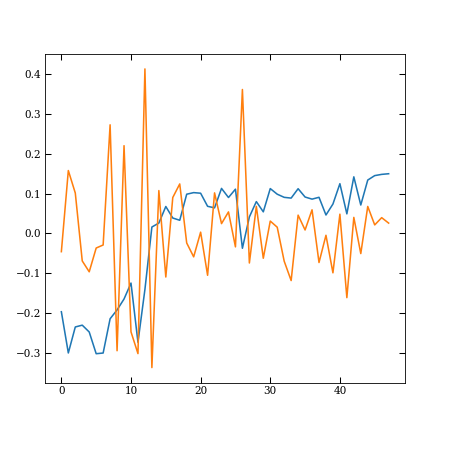

In [91]:
plt.plot(sigs,'-')

In [28]:
sigs.shape

(2310, 1)

In [13]:
np.nanmax(test2)

12029.528

In [8]:
np.where(test2<0)

(array([], dtype=int64),)

In [61]:
12*192

2304

In [73]:
x

6

In [62]:
test2[x:].shape

(2304,)